# SLE - Gene expression data pre-processing (RNAseq)

The following step only works in RStudio. If working in another environment, please set the working directory properly and check with input 3 if the working directory is correct!

In [ ]:
# set working directory
setwd(dirname(rstudioapi::callFun("getActiveDocumentContext")$path)) 

In [1]:
# check working directory
getwd()

[1] "C:/Users/Laurent/Jupyter-DataPreProcessing/SLE (RNAseq)"

In [3]:
# load libraries
library(readxl)
library(edgeR)
library(data.table)
library(biomaRt)
library(dplyr)

Warning message:
"package 'readxl' was built under R version 3.5.2"Warning message:
"package 'edgeR' was built under R version 3.5.2"Loading required package: limma
Warning message:
"package 'data.table' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following object is masked from 'package:biomaRt':

    select

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [18]:
# read data table and clean data
data <- as.data.frame(read_excel(file.path(getwd(), "Data", "Counts", "GSE112087_counts-matrix-EnsembIDs-GRCh37.p10.xlsx")))
row.names(data) <- data$ENSG_ID
data1 <- filter(data, data$`ENSG_ID` != "NA")

head(data1)
dim(data1)

New names:
* `Case 1` -> `Case 1..2`
* `Case 1` -> `Case 1..3`
* `Case 2` -> `Case 2..4`
* `Case 2` -> `Case 2..5`
* `Case 3` -> `Case 3..6`
* ... and 115 more


ENSG_ID,Case 1..2,Case 1..3,Case 2..4,Case 2..5,Case 3..6,Case 3..7,Case 4..8,Case 4..9,Case 5..10,...,Control 25..112,Control 25..113,Control 26..114,Control 26..115,Control 27..116,Control 27..117,Control 28..118,Control 28..119,Control 29..120,Control 29..121
ENSG00000223972,0,0,1,0,0,0,0,0,2,...,0,0,2,1,0,0,0,0,0,0
ENSG00000227232,9,13,26,21,18,14,5,6,9,...,14,17,13,16,22,17,14,18,21,19
ENSG00000243485,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000221311,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] 62069   121

In [14]:
# run EdgeR
group <- factor(c(rep("case", 62), rep("control", 58)))
y <- DGEList(counts = data1[,2:121], group = group)
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y, design)
fit <- glmQLFit(y, design)
qlf <- glmQLFTest(fit, coef = 2)
res <- as.data.frame(topTags(qlf,n=Inf))

In [17]:
# add row names as 1st column
res <- setDT(res, keep.rownames = TRUE)[]
colnames(res)[1] <- "GeneID"

head(res)
dim(res)

GeneID,logFC,logCPM,F,PValue,FDR
31762,-0.8531636,8.946759,128.8051,5.616781e-21,3.486280e-16
60753,-3.6190113,12.119700,121.5867,3.470175e-20,7.073875e-16
28730,-1.7880423,8.290834,121.2098,3.821949e-20,7.073875e-16
51487,-0.7270065,8.140407,119.8350,5.442603e-20,7.073875e-16
36956,-1.3555971,8.525345,119.6569,5.698396e-20,7.073875e-16
27106,-1.4183684,5.023418,117.4663,1.005474e-19,1.039988e-15


[1] 62069     6

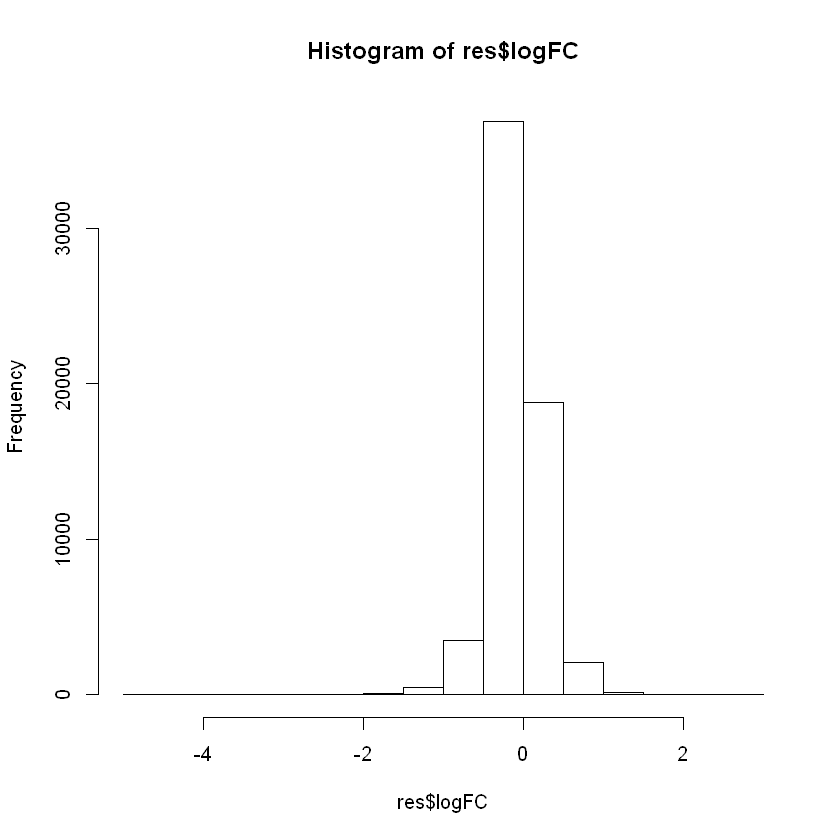

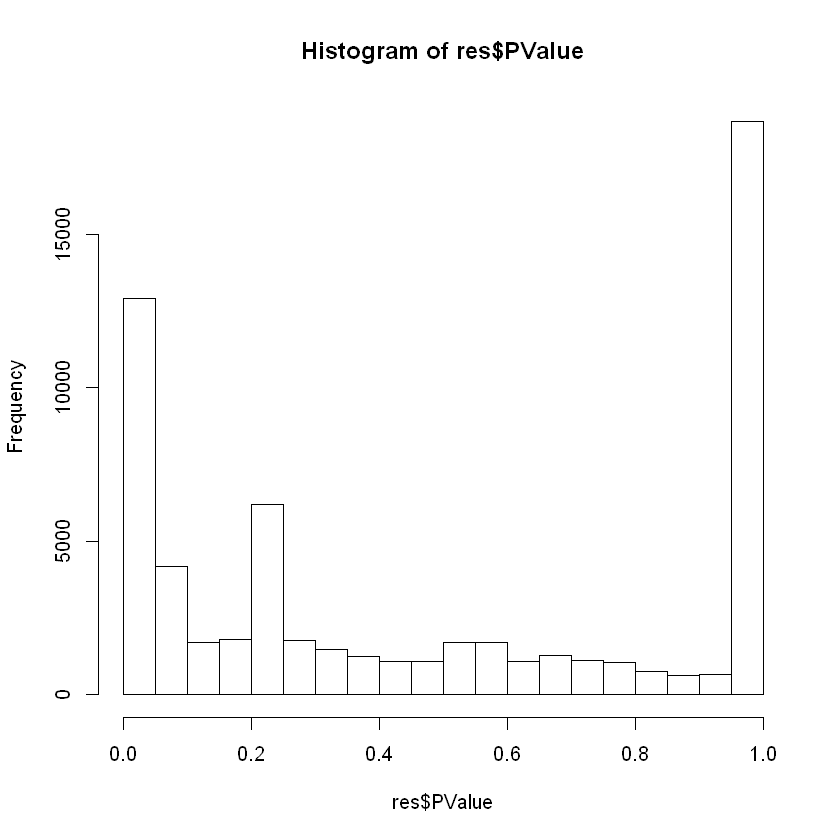

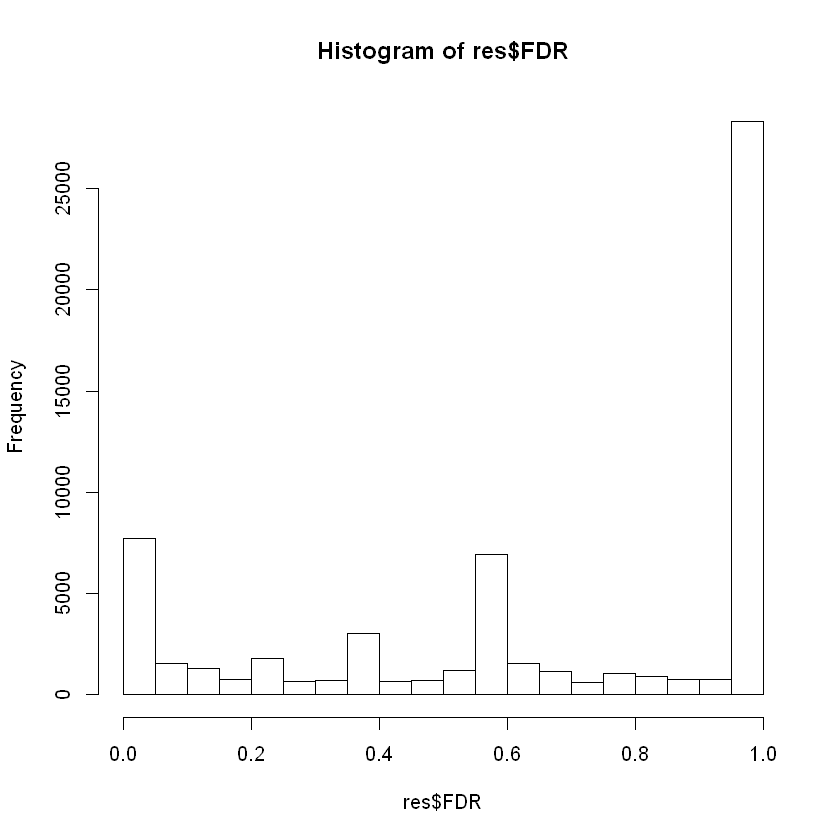

In [23]:
# check histograms of statistics
hist(res$logFC)
hist(res$PValue)
hist(res$FDR)

In [21]:
# save result
write.table(res, file.path(getwd(), "Data", "Stats", "SLE_stats1.txt"), quote=F, sep="\t", col.names=T, row.names=F)